### Topic: Salary Prediction based on Country and Race

#### The aim of this project to predict the salary of individuals from varied countries and races based on their demographics such as occupation, age, gender, experience, education, etc.

### Data Column Description

Column      | Description                                                                                                 |
| ------------- | -----------------------------------------------------------------------------------------------------------|
|Unnamed:0              | index
|Age                    | Age of the employee
|Education Level        | Education level of the employee
|Job Title              | Education level of the employee
|Years of Experience    | Years of experience of the empoyee
|Salary                 | Salary of the employee
|Country                | Country of the employee
|Race                   | Race of the employee

### Table of Contents

* Data Preprocessing
* Exploratory Data Analysis
* Data Preprocessing
* Coorelation Matrix Heatmap
* Train Test Split
* Model(Salary Prediction)
* Evaluting the Model
* Conclusion

In [79]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [80]:
#Loading the data
df = pd.read_csv('D:\ITC School\Introduction Data Science\Project for salary prediction/Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## Data Preprocessing

In [81]:
#Checking the shape of the data
df.shape

(6704, 9)

In [82]:
#Checking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

The number of row with null/missing value is very less as compared to the total number of rows, I will be dropping these rows

In [83]:
df.dropna(axis=0, inplace=True)

In [84]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

Dropping Unnamed Column beacuse it is just an index column

In [85]:
#dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

In [86]:
#Checking data type of each colum
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [87]:
#Checking for unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     35
Salary                 444
Country                  5
Race                    10
dtype: int64

The job title column has 191 different values. It will be very difficult to analyze so mant job title. So, I will group the job titles under similar job domains.

Groping Job Titles

In [88]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [89]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [90]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In the dataset the education level is represented in two different ways : Bachelor and Bachelor degree, which means same. So I will be grouping it with Bachelor

Grouping Education Level

In [91]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

In [92]:
df['Education Level'].unique()

array(['Bachelors', 'Masters', 'PhD', 'High School'], dtype=object)

Desriptive Statistcs

In [93]:
# Descriptive statistics
df.describe().style.background_gradient(cmap='rainbow')

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.094357,115329.253061
std,7.615784,6.061212,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [94]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.

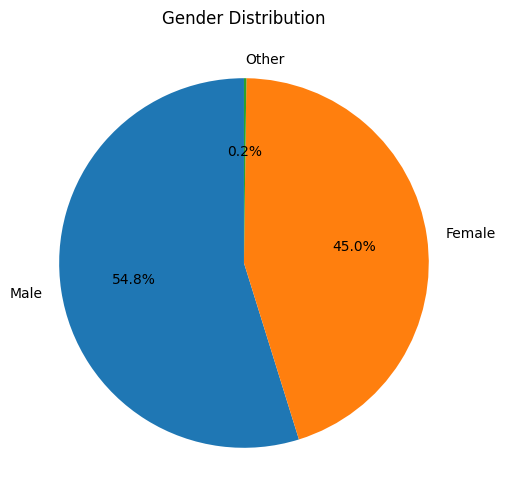

In [95]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

The pie chart shows that majority of the employees are male with 54.8 % on the dataset, followed by females with 45% and 0.2% employees belong to other gender.

<function matplotlib.pyplot.show(close=None, block=None)>

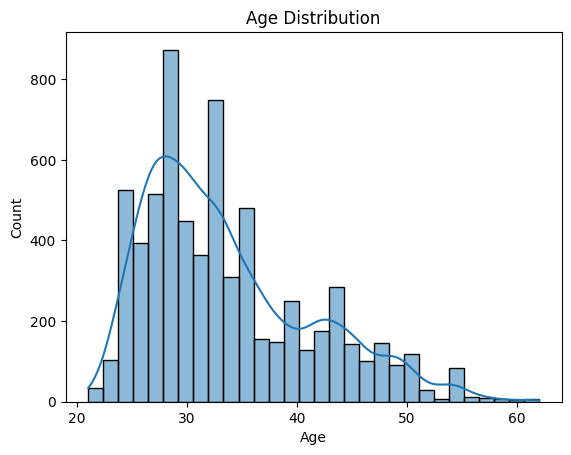

In [96]:
#Age Distribution
sns.histplot(data=df, x='Age', bins = 30, kde=True,)
plt.title('Age Distribution')
plt.show

Majority of the employees are in the range of 25 - 35 years of age, which means majority of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than 55 years.

<function matplotlib.pyplot.show(close=None, block=None)>

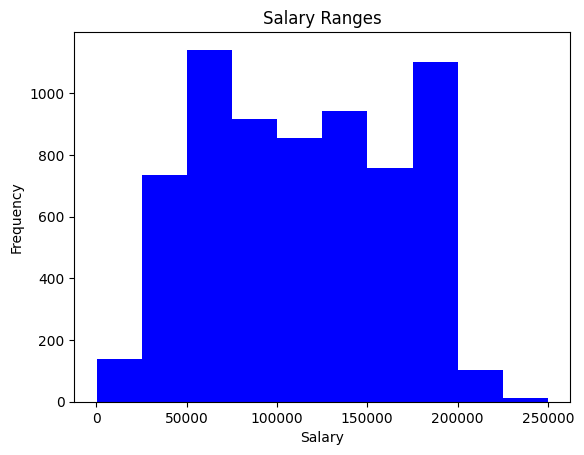

In [97]:
df.Salary.plot.hist(color='blue')
plt.xlabel('Salary')
plt.title('Salary Ranges')
plt.show


The most frequent salary ranges appear to be around 50,000 to 60,000 and 150,000 to 160,000. The spread of the salary data is wide, extending up to about 250,000, with fewer instances of higher salaries, indicating that these are less common

([0, 1, 2, 3],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

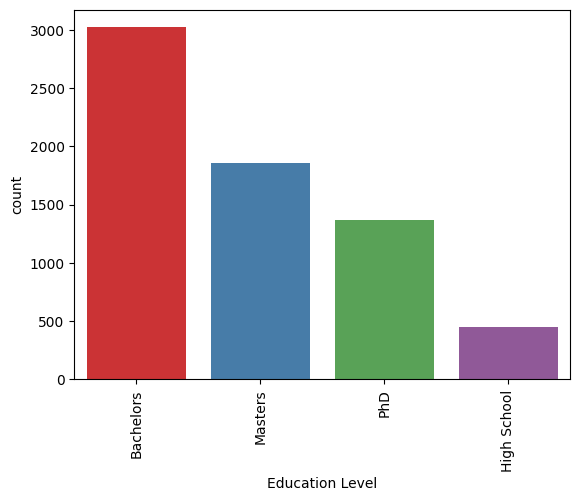

In [98]:
#Education Level
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks(rotation=90)

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

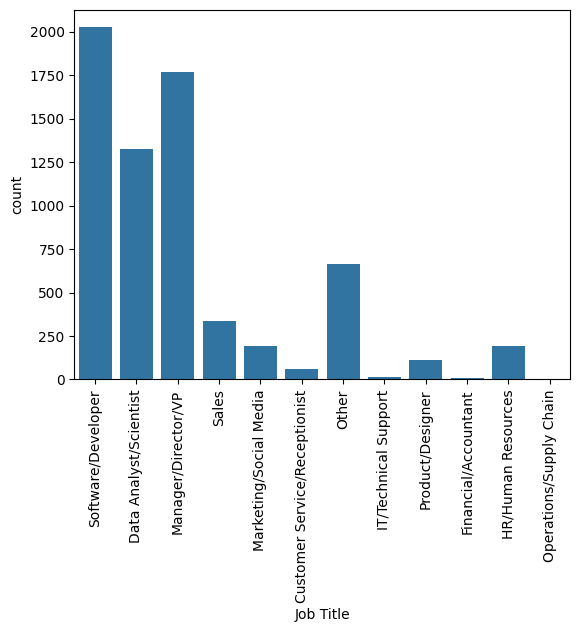

In [99]:
#Job Title
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

<Axes: xlabel='Years of Experience', ylabel='Count'>

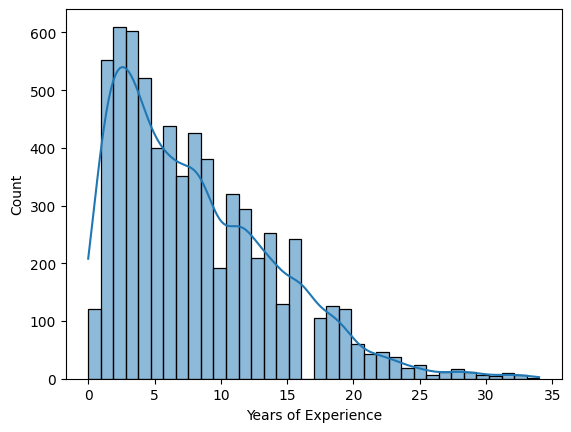

In [100]:
#Years of Experience
sns.histplot(x = 'Years of Experience', data = df,kde=True,)

Most of the employees in the dataset have experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

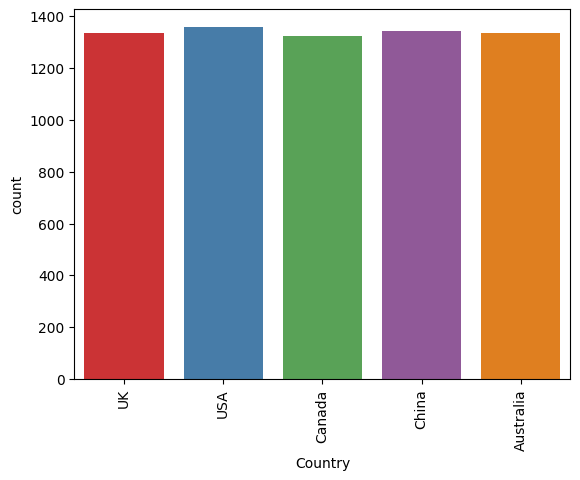

In [101]:
#Country
sns.countplot(x='Country', data=df, palette='Set1',)
plt.xticks(rotation=90)

The number of employees from the above 5 countries is nearly same, with a little more in USA.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

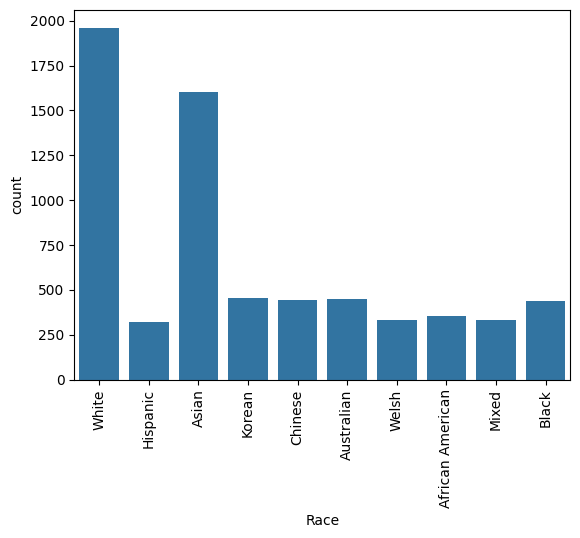

In [102]:
#Racial Distribution
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

explore the realtion of these independent variables with the target Variable i.e. Salary

Text(0.5, 1.0, 'Age vs Salary')

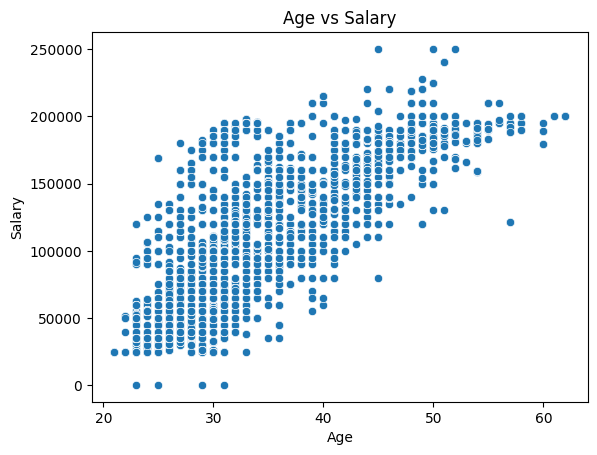

In [103]:
#Age and Salary
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

In this scatter plot we see a trend that the salary of the person increases with increse in the age, which is obvious because of promotion and apprisals. 

Text(0.5, 1.0, 'Gender vs Salary')

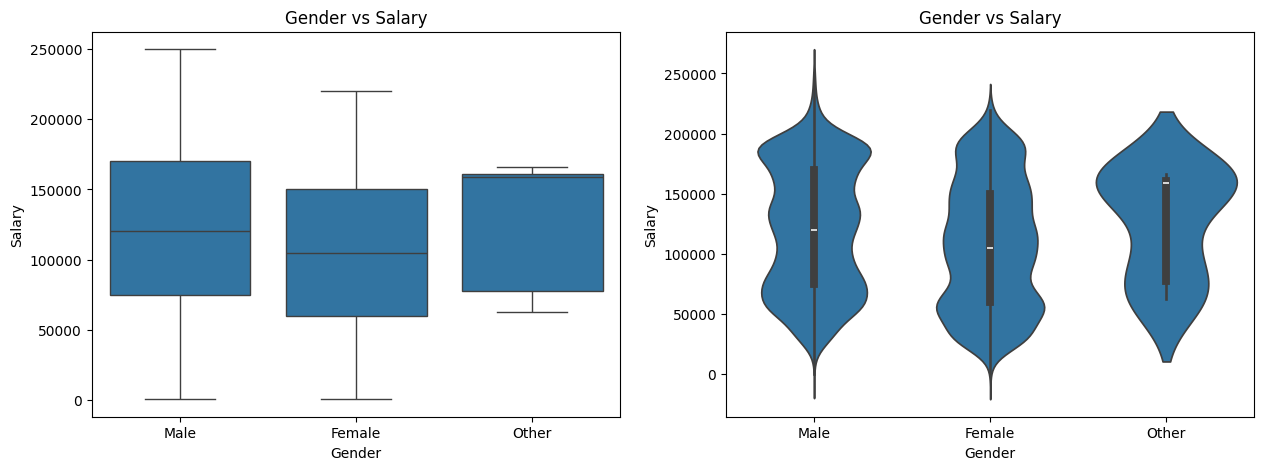

In [104]:
#Gender and Salary
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

Text(0.5, 1.0, 'Education Level vs Salary')

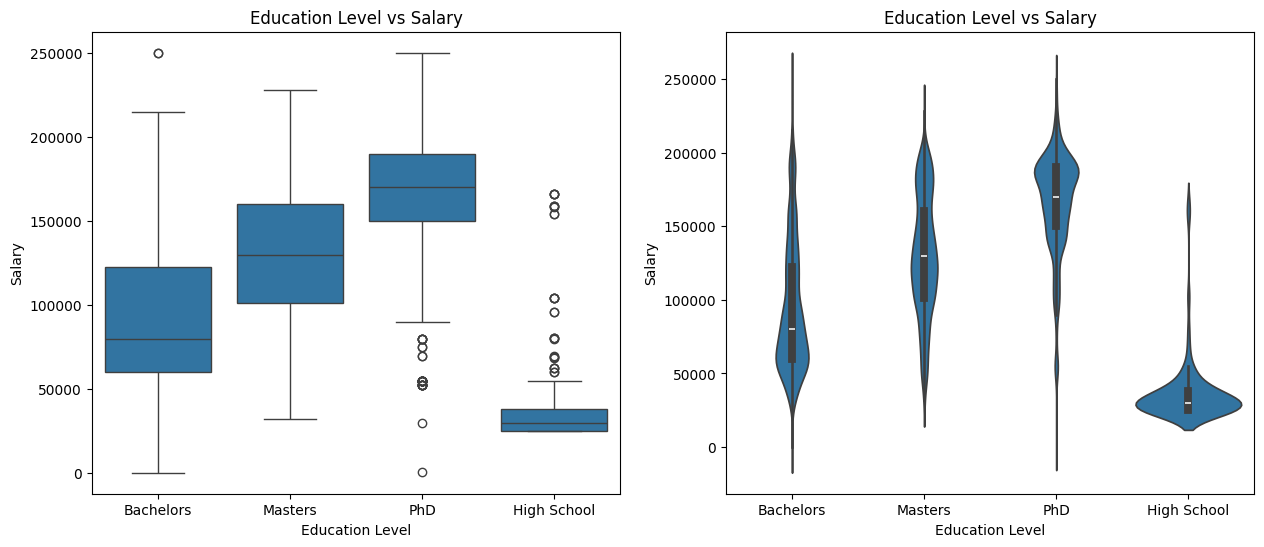

In [105]:
#Education Level and Salary
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')

The boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

<Axes: xlabel='Country', ylabel='Salary'>

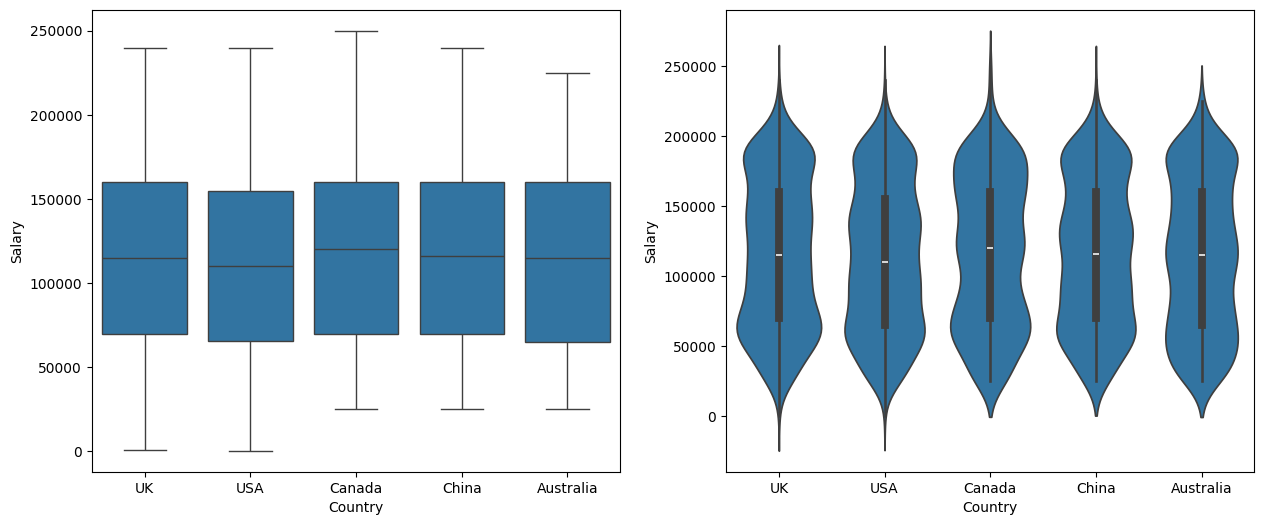

In [106]:
#Country and Salary
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])

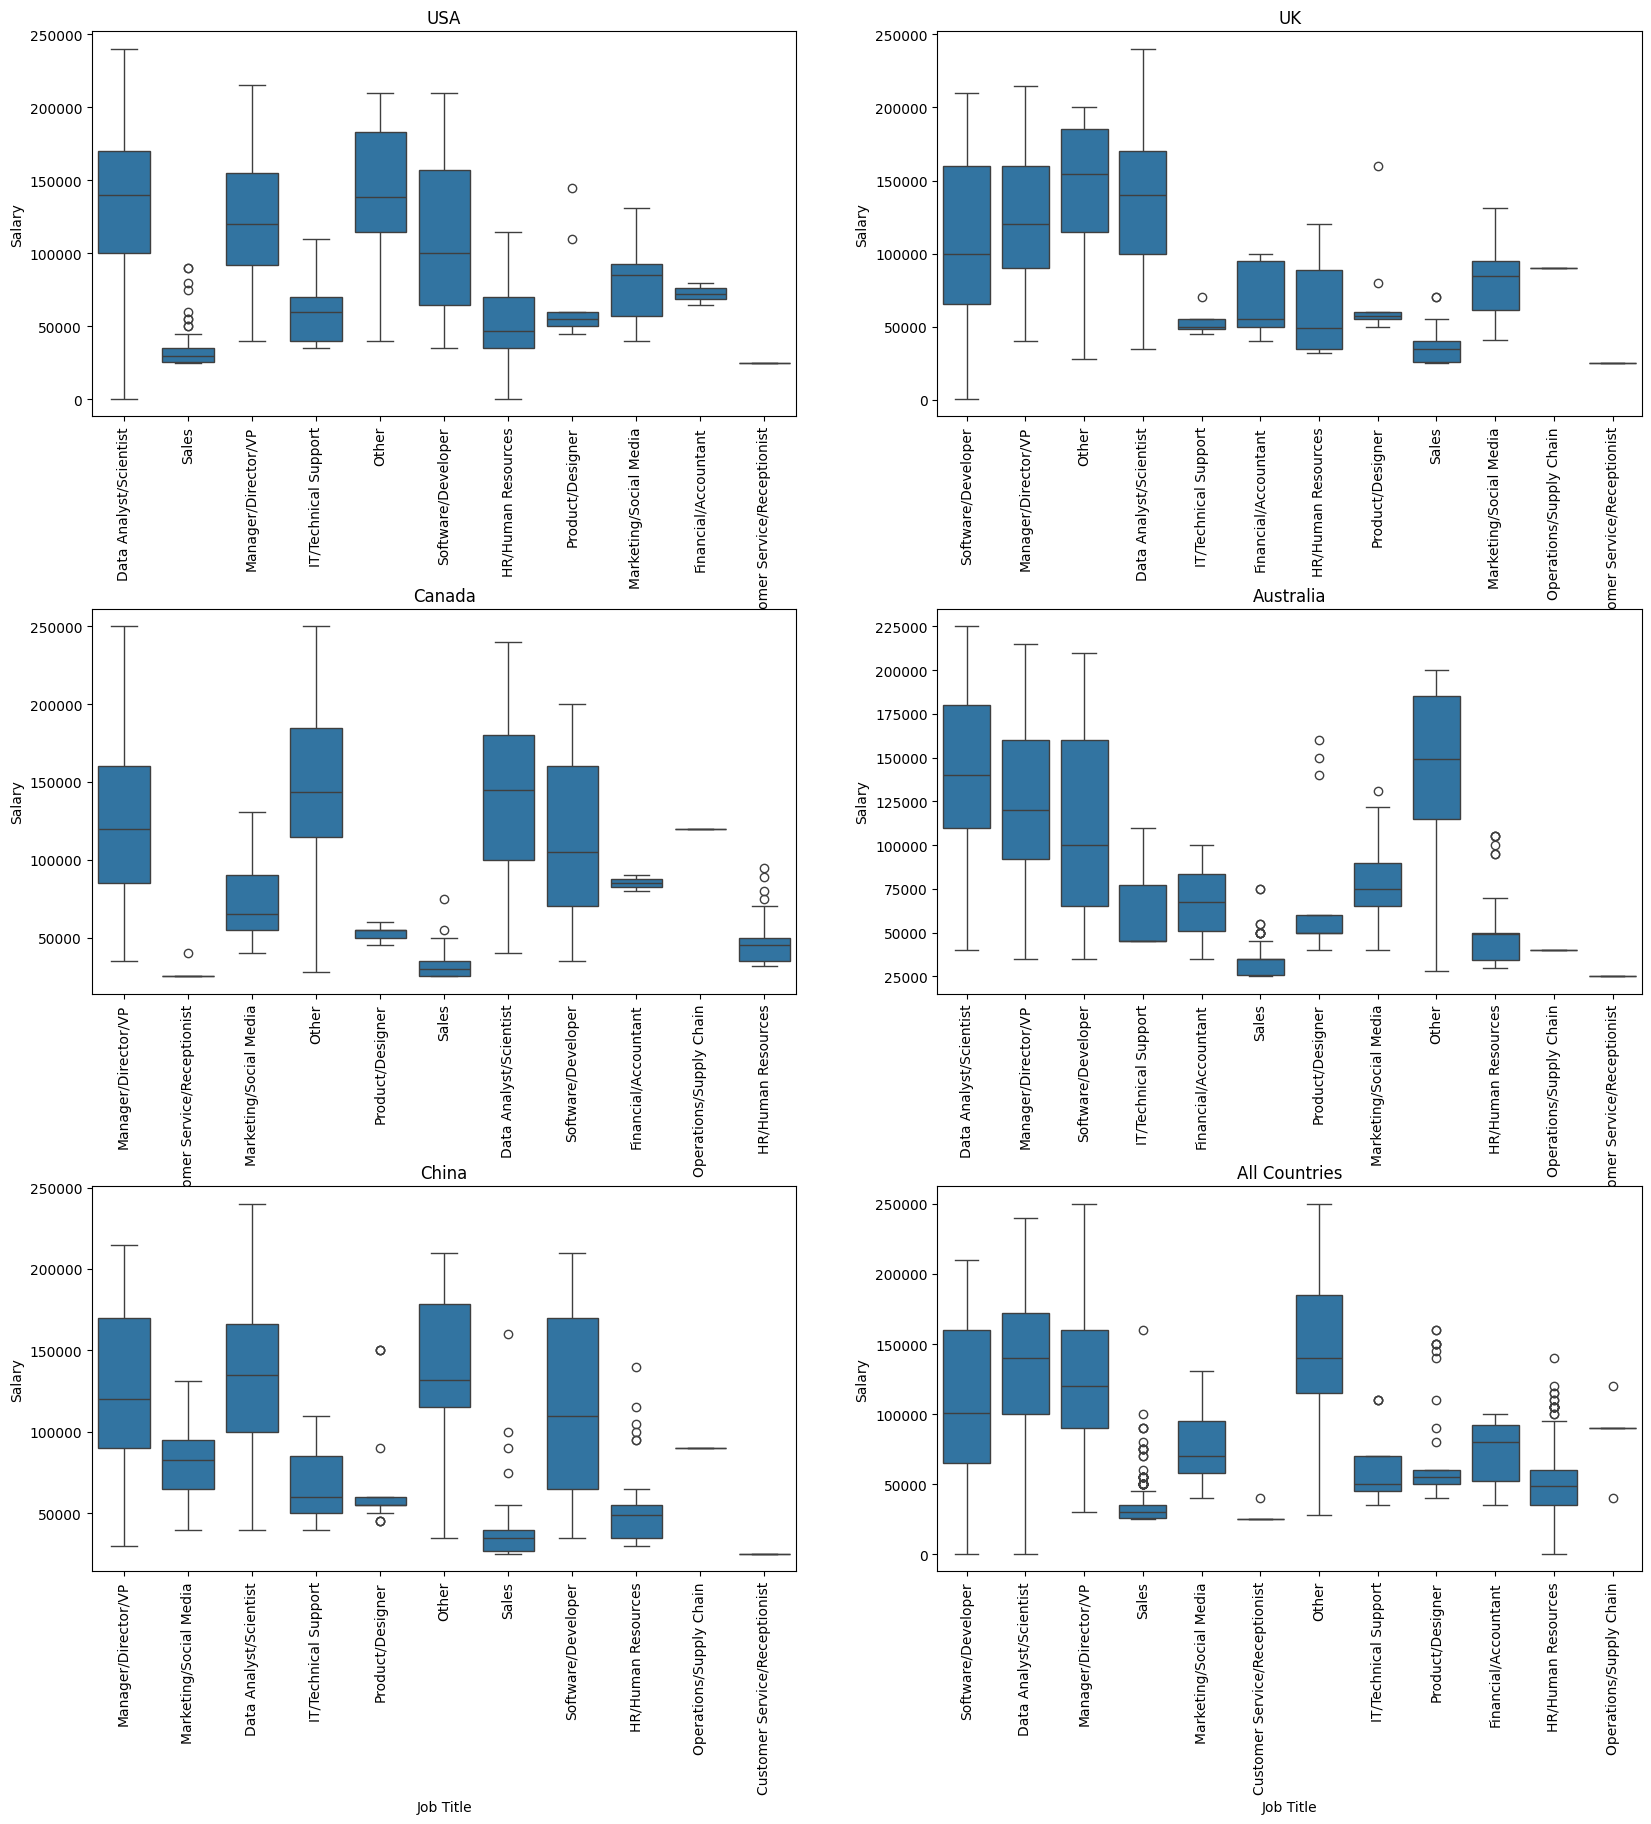

In [107]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

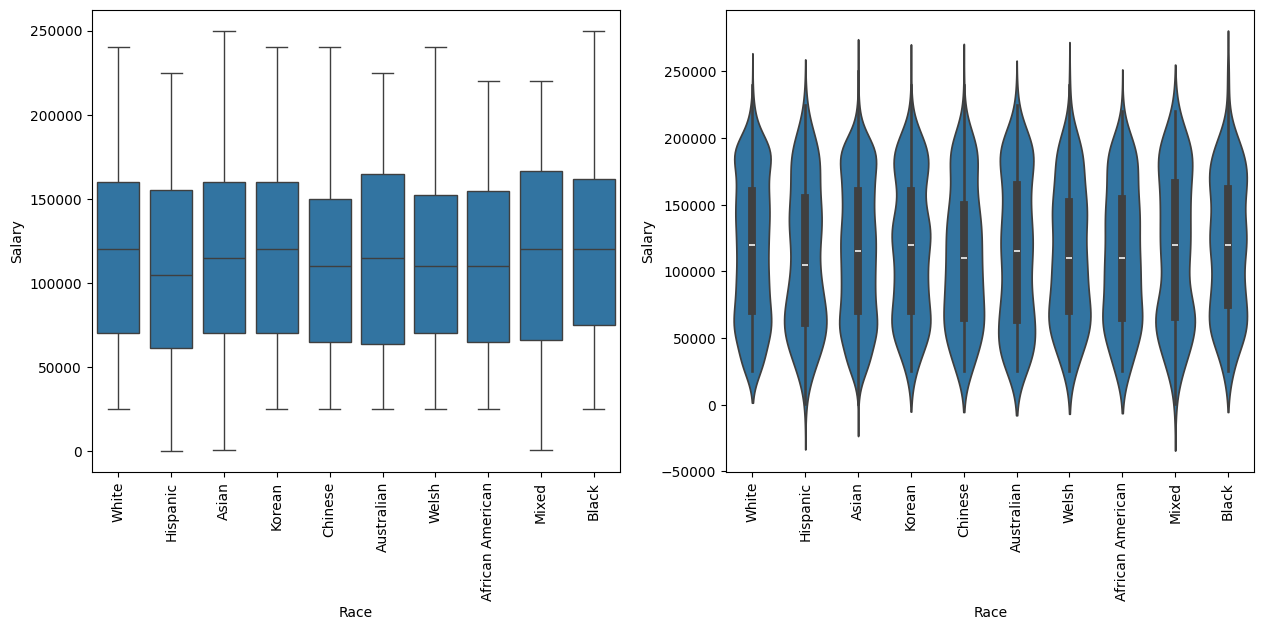

In [108]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)

The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from hispanic race. Looking at the violinplot the salary distribution is more concentrated after 150k in white, australian, black and mixed race. Whereas the hispanic has more concentration near 75k

### Data Preprocessing 2

In [109]:
#Label encoding to categorical features
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalization

In [110]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [111]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510556,-0.479849,3,9
1,-0.738393,0,2,1,-0.840547,-0.953461,4,5
2,1.493980,1,3,5,1.139402,0.656819,1,9
3,0.312135,0,0,10,-0.180564,-1.048183,4,5
4,2.413192,1,2,5,1.964381,1.604042,4,1


Coorelation Matrix Heatmap

<Axes: >

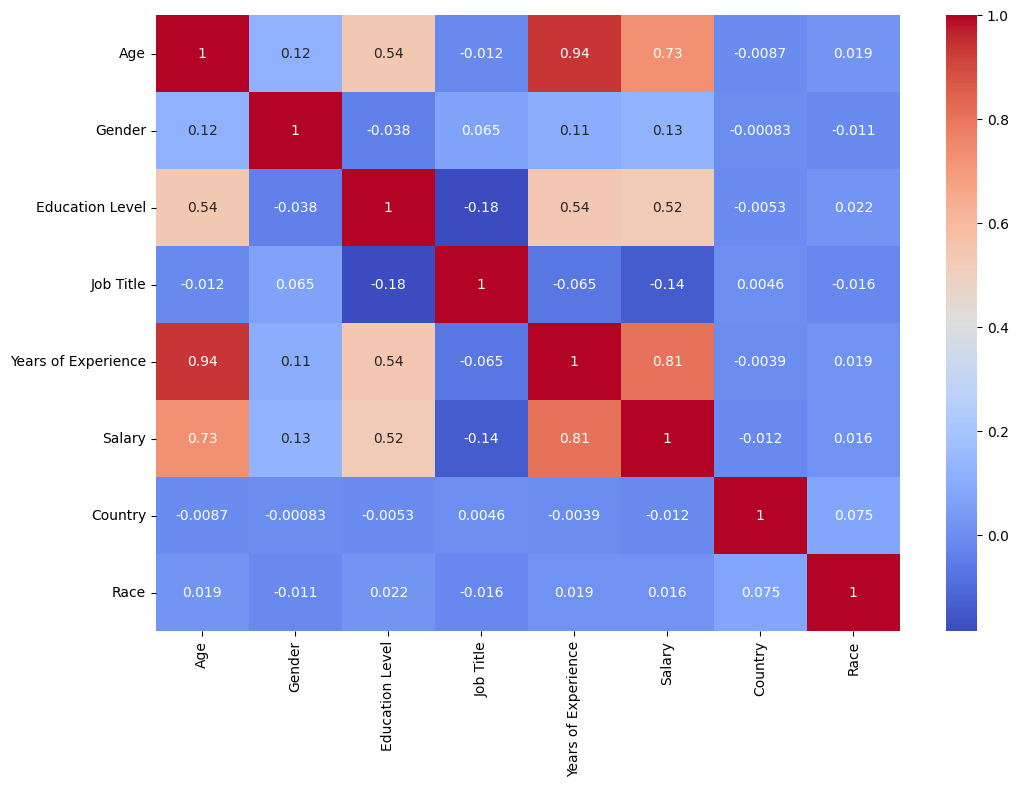

In [112]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


In [113]:
df = df.drop(['Race'], axis=1)
df = df.drop(['Country'], axis=1)

In this coorelation matrix, there are three major coorealtions.

Salary and Age
Salary and Years of Experience
Years of Experience and Age
The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

Train Test Split

In [114]:
df.dtypes

Age                    float64
Gender                   int32
Education Level          int32
Job Title                int32
Years of Experience    float64
Salary                 float64
dtype: object

Building Dependent and Independent variable

In [115]:
df1=df.copy()

In [116]:
df1.dtypes

Age                    float64
Gender                   int32
Education Level          int32
Job Title                int32
Years of Experience    float64
Salary                 float64
dtype: object

In [117]:
X_train1 = df.drop(columns="Salary")
y_train1 = df["Salary"]
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   int32  
 2   Education Level      6698 non-null   int32  
 3   Job Title            6698 non-null   int32  
 4   Years of Experience  6698 non-null   float64
dtypes: float64(2), int32(3)
memory usage: 235.5 KB


In [118]:
from sklearn.model_selection import train_test_split
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X_train1 ,y_train1 ,test_size=0.25 , random_state=42 )
print("X_train shape1:", X_train1.shape)
print("y_train shape1:", y_train1.shape)
print("X_test shape1:", X_test1.shape)
print("y_test shape1:", y_test1.shape)

X_train shape1: (5023, 5)
y_train shape1: (5023,)
X_test shape1: (1675, 5)
y_test shape1: (1675,)


In [119]:
# from sklearn.model_selection import train_test_split
# X_train1, X_test1, y_train1, y_test1 = train_test_split(df1.drop('Salary', axis=1), df1['Salary'], test_size=0.2, random_state=42)
# X_train1.info()

In [120]:
X_train1

,Age,Gender,Education Level,Job Title,Years of Experience
5356,-0.738393,1,0,9,-0.840547
4059,0.968716,0,2,5,0.809411
6552,0.968716,1,0,5,0.644415
4098,-0.081813,0,0,5,-0.015568
3108,0.574767,1,2,11,1.304398
...,...,...,...,...,...
3776,-0.607077,1,0,11,-0.675552
5195,0.574767,0,2,5,0.974406
5230,-1.132341,1,0,11,-1.170539
5395,-0.869709,1,0,11,-1.170539


In [121]:
X_train1

,Age,Gender,Education Level,Job Title,Years of Experience
5356,-0.738393,1,0,9,-0.840547
4059,0.968716,0,2,5,0.809411
6552,0.968716,1,0,5,0.644415
4098,-0.081813,0,0,5,-0.015568
3108,0.574767,1,2,11,1.304398
...,...,...,...,...,...
3776,-0.607077,1,0,11,-0.675552
5195,0.574767,0,2,5,0.974406
5230,-1.132341,1,0,11,-1.170539
5395,-0.869709,1,0,11,-1.170539


In [122]:
### Looking at the new test data - Y
y_train1

5356   -1.048183
4059    0.467374
6552    0.088485
4098   -0.385127
3108    0.751352
          ...   
3776   -0.953461
5195    1.035708
5230   -1.142906
5395   -1.142906
862    -0.100960
Name: Salary, Length: 5023, dtype: float64

### Salary Prediction

I will be using the following models:

### Linear Regression

In [123]:
## building linear Model

from sklearn import linear_model

lr = linear_model.LinearRegression()

# Train the model using the training sets

lr.fit(X_train1,y_train1)

LinearRegression()

In [124]:
lr.intercept_

-0.0863856349991896

In [125]:
lr.coef_

array([-0.26950611,  0.11939102,  0.10440209, -0.01616472,  0.98958197])

In [126]:
import statsmodels.api as sm
X_train1 = sm.add_constant(X_train1)
model = sm.OLS(y_train1, X_train1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2165.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:16:31   Log-Likelihood:                -4220.3
No. Observations:                5023   AIC:                             8453.
Df Residuals:                    5017   BIC:                             8492.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0864    

In [127]:
df2=df.copy()

### Decision Tree Regressor

Train Test Split

In [128]:
X_train2 = df.drop(columns="Salary")
y_train2 = df["Salary"]
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   int32  
 2   Education Level      6698 non-null   int32  
 3   Job Title            6698 non-null   int32  
 4   Years of Experience  6698 non-null   float64
dtypes: float64(2), int32(3)
memory usage: 235.5 KB


In [129]:
from sklearn.model_selection import train_test_split
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X_train2 ,y_train2 ,test_size=0.25 , random_state=42 )
print("X_train shape2:", X_train2.shape)
print("y_train shape2:", y_train2.shape)
print("X_test shape2:", X_test2.shape)
print("y_test shape2:", y_test2.shape)

X_train shape2: (5023, 5)
y_train shape2: (5023,)
X_test shape2: (1675, 5)
y_test shape2: (1675,)


In [130]:
# from sklearn.model_selection import train_test_split
# X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.drop('Salary', axis=1), df2['Salary'], test_size=0.2, random_state=42)

In [131]:
from sklearn.tree import DecisionTreeRegressor
#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

### Hypertuning the model

In [132]:
# from sklearn.model_selection import GridSearchCV

# #defining the parameters for the grid search
# parameters = {'max_depth' :[2,4,6,8,10],
#               'min_samples_split' :[2,4,6,8],
#               'min_samples_leaf' :[2,4,6,8],
#               'random_state' :[0.2,42]}
# #creating the grid search object
# grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

# #fit the grid search object to the training data
# grid_search.fit(X_train2,y_train2)

# #print the best parameters
# print(grid_search.best_params_)

Building the model on best parameters

In [133]:
# # Assuming X_train is your training dataset and X_test is your test dataset
# # Add missing columns to X_test with default value of 0
# missing_cols = set(X_train2.columns) - set(X_test2.columns)
# for c in missing_cols:
#     X_test2[c] = 0

# # Ensure the order of columns in X_test matches that of X_train
# X_test2 = X_test2[X_train2.columns]


In [134]:
# dtree = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, random_state = 42)
# dtree

In [135]:
#fitting the training data
dtree.fit(X_train2,y_train2)

DecisionTreeRegressor()

In [136]:
#training accuracy
dtree.score(X_train2, y_train2)

0.9822345300158984

In [137]:
#predicting the salary of an employee 
d_pred2 = dtree.predict(X_test2)

Evaluating the Decision Tree Regressor Model

In [138]:
dft = pd.DataFrame({'Actual': y_test2, 'Predicted': d_pred2})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.656819
1,-0.745659,-0.784135
2,-0.290405,-0.290405
3,-1.048183,-1.017628
4,-0.669294,-0.601635
5,1.414598,1.486456
6,-0.820850,-0.713165
7,-1.142906,-1.123961
8,1.509320,1.555913
9,0.277930,0.313770


<Axes: xlabel='Predicted', ylabel='Density'>

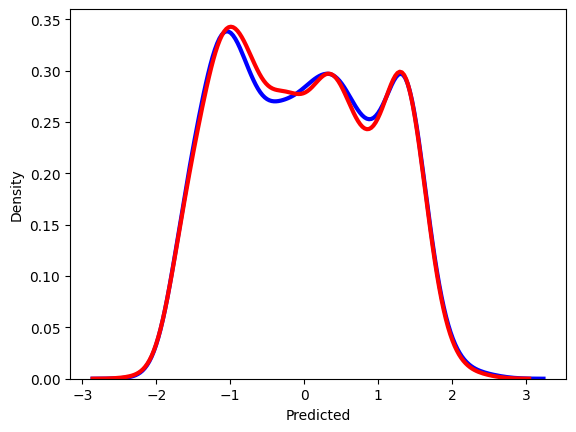

In [139]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [140]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test2, d_pred2))
print("Mean Squared Error: ", mean_squared_error(y_test2, d_pred2))
print("Mean Absolute Error: ", mean_absolute_error(y_test2, d_pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test2, d_pred2)))

R2 Score:  0.9323599817255868
Mean Squared Error:  0.06921627260029607
Mean Absolute Error:  0.10682497962932143
RMSE: 0.2630898565135039


# Random Forest Regressor

In [141]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()

In [142]:
#trainig the model
rfg.fit(X_train2, y_train2)

RandomForestRegressor()

In [143]:
#training accuracy
rfg.score(X_train2, y_train2)

0.9796333228181816

In [144]:
#predicitng salary of the employee
r_pred2 = rfg.predict(X_test2)

In [145]:
dfr = pd.DataFrame({'Actual': y_test2, 'Predicted': r_pred2})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.656819
1,-0.745659,-0.771735
2,-0.290405,-0.290405
3,-1.048183,-1.017032
4,-0.669294,-0.594879
5,1.414598,1.486781
6,-0.820850,-0.717661
7,-1.142906,-1.125947
8,1.509320,1.555628
9,0.277930,0.312907


<Axes: xlabel='Predicted', ylabel='Density'>

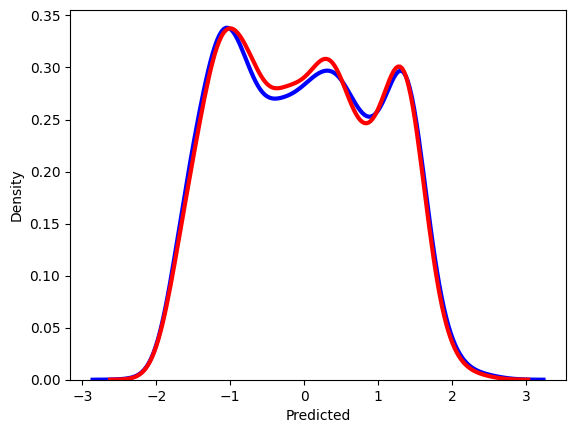

In [146]:
ax = sns.distplot(dfr['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dfr['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit

In [147]:
print("R2 Score: ", r2_score(y_test2, r_pred2))
print("Mean Squared Error: ", mean_squared_error(y_test2, r_pred2))
print("Mean Absolute Error: ", mean_absolute_error(y_test2, r_pred2))
print('RMSE:', np.sqrt(mean_squared_error(y_test2, r_pred2)))

R2 Score:  0.9490538317023343
Mean Squared Error:  0.052133396217098935
Mean Absolute Error:  0.10278396703574573
RMSE: 0.22832738823255289


## XGBoost

In [148]:
df3=df.copy()


In [149]:
X_train3 = df.drop(columns="Salary")
y_train3 = df["Salary"]
X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   int32  
 2   Education Level      6698 non-null   int32  
 3   Job Title            6698 non-null   int32  
 4   Years of Experience  6698 non-null   float64
dtypes: float64(2), int32(3)
memory usage: 235.5 KB


In [150]:
from sklearn.model_selection import train_test_split
X_train3 , X_test3 , y_train3 , y_test3 = train_test_split(X_train3 ,y_train3 ,test_size=0.25 , random_state=42 )
print("X_train shape3:", X_train3.shape)
print("y_train shape3:", y_train3.shape)
print("X_test shape3:", X_test3.shape)
print("y_test shape3:", y_test3.shape)

X_train shape3: (5023, 5)
y_train shape3: (5023,)
X_test shape3: (1675, 5)
y_test shape3: (1675,)


In [151]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Other steps in your code...

xgb_model = xgb.XGBRegressor()
#fit the model on the training data
xgb_model.fit(X_train3, y_train3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [152]:
# Make predictions on the test data
y_pred3 = xgb_model.predict(X_test3)


In [153]:
#Evaluate the model's performance
mse3 = mean_squared_error(y_test3, y_pred3)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.05136265217472296


In [154]:
#calulate the R-squared score
r2 = r2_score(y_test3, y_pred3)
print("R-Squared Score:", r2)

R-Squared Score: 0.9498070236780458


## Conclusion

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:

Years of Experience

Job Title

Education Level

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models - Decision Tree Regressor and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%

### Noted 

 We must use the training set to train the model. The test one is used to evaluate the performance of the trained model. 